In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from disp import set_plot, colors
from kernels import make_psi_rand_tanh, make_psi_rand_k_wta, make_psi_rand_th_wta

In [2]:
RS = np.array([.1, .3, .5, 1, 1.5, 2,])
THETAS = np.linspace(-np.pi, np.pi, 181)

## RAND-TANH vs GAUSSIAN

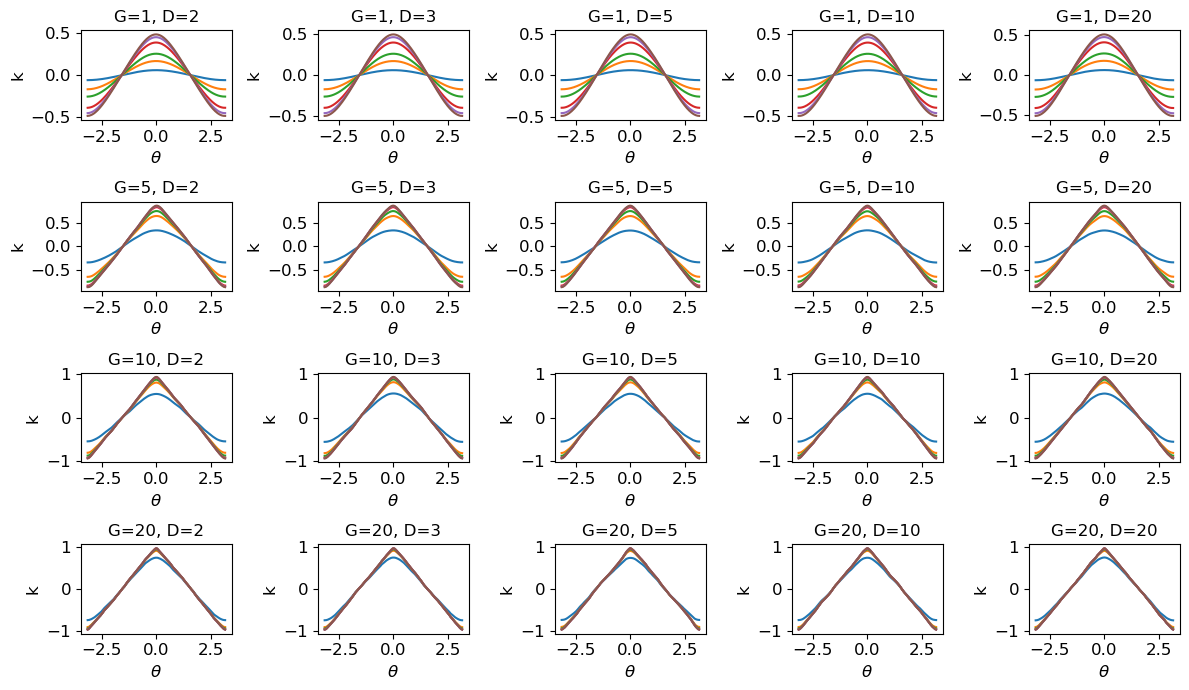

In [3]:
DS = [2, 3, 5, 10, 20]
GS = [1, 5, 10, 20]
N = 2000

fig, axs = plt.subplots(len(GS), len(DS), figsize=(12, 7), tight_layout=True)

for cG, G in enumerate(GS):
    for cD, D in enumerate(DS):
        ax = axs[cG, cD]
        J_PSI = G*np.random.randn(N, D)
        psi, ker = make_psi_rand_tanh(J_PSI)
        
        # pick two rand orth vectors
        e_0, e_1 = stats.ortho_group.rvs(D)[:2, :]
        
        for r in RS:
            x_star = r*(np.cos(0)*e_0 + np.sin(0)*e_1)
            
            ker_vals = np.nan*np.zeros(len(THETAS))
            for ctheta, theta in enumerate(THETAS):
                x = (np.cos(theta)*e_0 + np.sin(theta)*e_1)
                ker_vals[ctheta] = ker(x, x_star)
                
            ax.plot(THETAS, ker_vals)
            
        set_plot(ax, x_label=r'$\theta$', y_label='k', title=f'G={G}, D={D}')

## RAND-K-WTA vs ANGULAR TRIANGLE

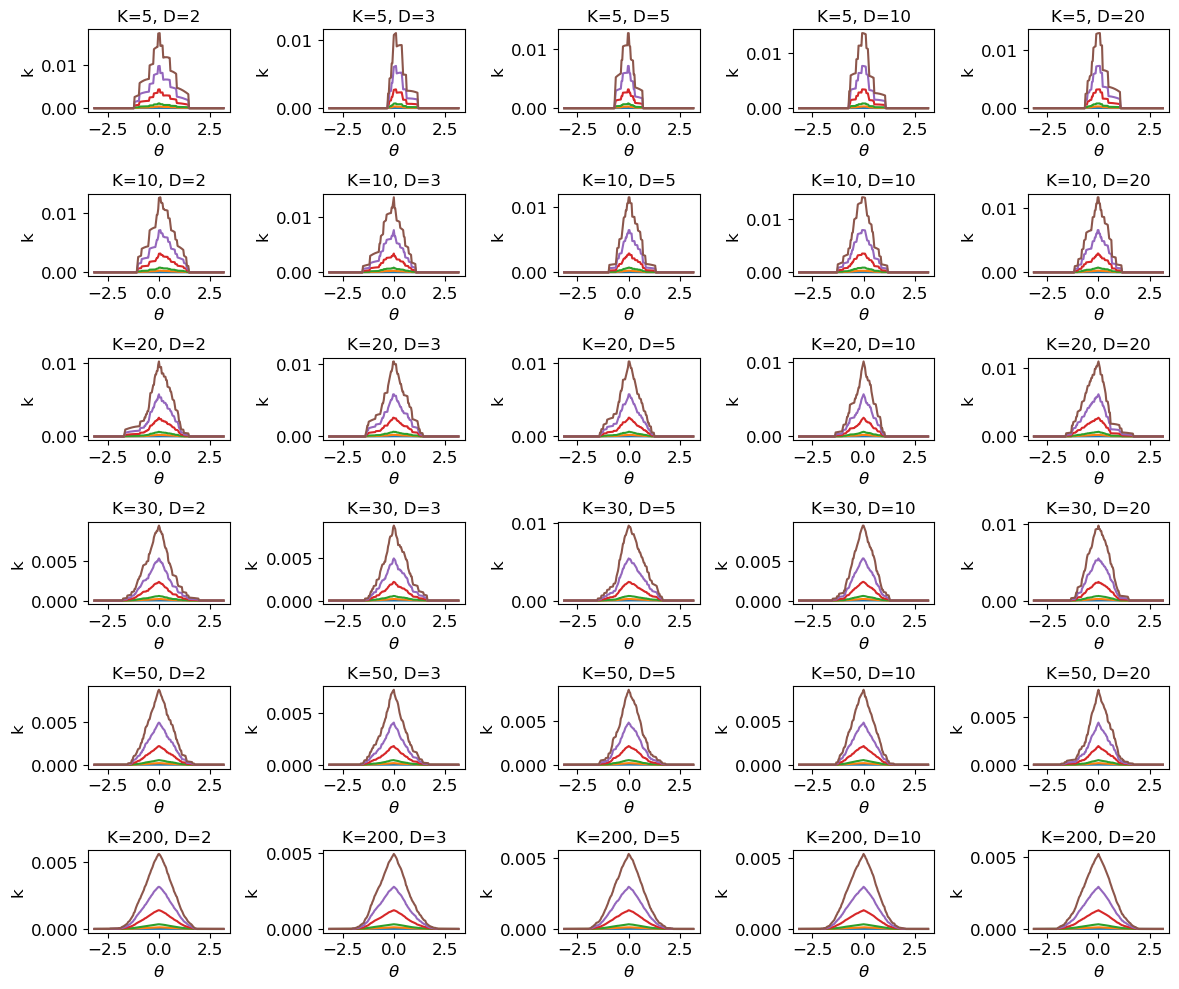

In [4]:
DS = [2, 3, 5, 10, 20]
KS = [5, 10, 20, 30, 50, 200]

G = 1
N = 3000

fig, axs = plt.subplots(len(KS), len(DS), figsize=(12, 10), tight_layout=True)

for cK, K in enumerate(KS):
    for cD, D in enumerate(DS):

        ax = axs[cK, cD]
        J_PSI = G*np.random.randn(N, D)
        psi, ker = make_psi_rand_k_wta(J_PSI, K)
        
        e_0, e_1 = stats.ortho_group.rvs(D)[:2, :]
        for r in RS:

            x_star = r*(np.cos(0)*e_0 + np.sin(0)*e_1)
            
            ker_vals = np.nan*np.zeros(len(THETAS))
            for ctheta, theta in enumerate(THETAS):
                x = r*(np.cos(theta)*e_0 + np.sin(theta)*e_1)
                ker_vals[ctheta] = ker(x, x_star)
                
            ax.plot(THETAS, ker_vals)
        
        set_plot(ax, x_label=r'$\theta$', y_label='k', title=f'K={K}, D={D}')